Linear regression involving multiple variables is called __“multiple linear regression” or multivariate linear regression.__

https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

You have to predict the price of the house based upon its area, number of bedrooms, the average income of the people in the area, the age of the house, and so on. In this case, the dependent variable(target variable) is dependent upon several independent variables. A regression model involving multiple variables can be represented as:

This is the equation of a __hyperplane__.  
Remember, a linear regression model in two dimensions is a straight line; in three dimensions it is a plane, and in more than three dimensions, a hyperplane.

https://hackernoon.com/an-intuitive-perspective-to-linear-regression-7dc566b2c14c

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
df=pd.read_csv('../Data/winequality.csv')

In [4]:
df.shape

(1599, 12)

In [5]:
df.sample(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
58,7.8,0.59,0.18,2.3,0.076,17.0,54.0,0.99750,3.43,0.59,10.0,5
1080,10.3,0.27,0.56,1.4,0.047,3.0,8.0,0.99471,3.16,0.51,11.8,6


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

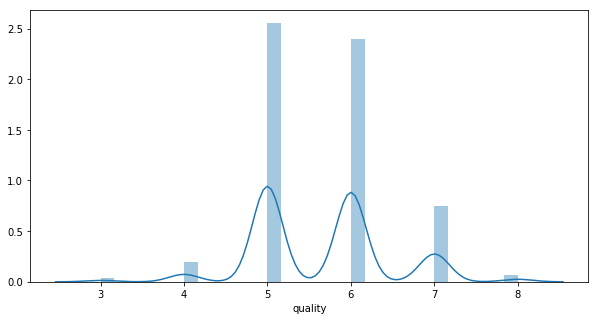

In [20]:
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.distplot(df['quality'])

We can observe that most of the time the value is either 5 or 6.


### Divide the data into “attributes” and “labels”. 
X variable contains all the attributes/features and y variable contains labels.

In [37]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
#intercept_ represents the coefficient, 𝑏₀ 
regressor.intercept_

34.99871062872145

In [39]:
#what coefficients our regression model has chosen
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


This means that for a unit increase in “density”, there is a decrease of 31.51 units in the quality of the wine.  
Similarly, a unit decrease in “Chlorides“ results in an increase of 1.87 units in the quality of the wine.  
We can see that the rest of the features have very little effect on the quality of the wine.

In [40]:
y_pred = regressor.predict(X_test)

In [42]:
#Check the difference between the actual value and predicted value.
df_diff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


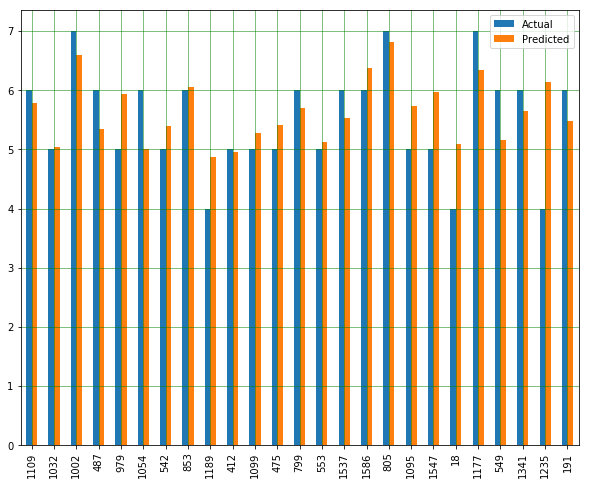

In [50]:
#plot the comparison of Actual and Predicted values
df1 = df_diff.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Evaluate the performance of the algorithm. 
We’ll do this by finding the values for MAE, MSE, and RMSE. 

In [51]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.46963309286611105
Mean Squared Error: 0.3844711978201246
Root Mean Squared Error: 0.620057414938427


You can see that the value of root mean squared error is 0.62, which is slightly greater than 10% of the mean value which is 5.63.  
This means that our algorithm was not very accurate but can still make reasonably good predictions.

There are many factors that may have contributed to this __inaccuracy__, for example:  
* Need more data: We need to have a huge amount of data to get the best possible prediction.  
* Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case.  
Visualizing the data may help you determine that.
* Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.